In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## one sample t-test

In [2]:
x= [ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]

mean  = np.mean(x)
print("mean=",mean)
h0 = 1.75
standard_deviation = np.std(x,ddof=1)
n = len(x)

t_test = (mean-h0)/(standard_deviation/np.sqrt(n))
print("t test observation value = ",t_test)


mean= 1.816
t test observation value =  2.3968766311585883


## Plot

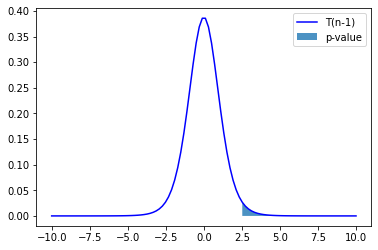

In [3]:
t_values = np.linspace(-10,10,100)
plt.plot(t_values,stats.t.pdf(t_values,n-1),"b-",label ="T(n-1)")
upper_tval_tvalues = t_values[t_values>t_test]
plt.fill_between(upper_tval_tvalues,0,stats.t.pdf(upper_tval_tvalues,n-1),alpha = .8,label="p-value")
plt.legend()

## Pearson Correlation test

In [4]:
n= 50
x = np.random.normal(size=n)
y = 2+x+np.random.normal(size=n)

cor,pval = stats.pearsonr(x,y)
print(cor,pval)

0.6820417199892743 4.928602428585132e-08


## Two sample(Student)-  t - test : compare two means

In [5]:
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,
1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])
grp = np.array(["M"] * 10 + ["F"] * 10)

print(stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)


##   Chi-square


In [11]:
canalar_tumor = np.array([1] * 10 + [0] * 5)
meta = np.array([1] * 8 + [0] * 6 + [1])
crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)


Observed table:
---------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics:
-----------
Chi2 = 2.812500, pval = 0.093533
Expected table:
---------------
[[2. 3.]
 [4. 6.]]


In [15]:
canalar_tumor = np.array([1] * 10 + [0] * 5)
print(canalar_tumor)

meta = np.array([1] * 8 + [0] * 6 + [1])
print(meta)
crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
crosstab

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]


meta,0,1
canalar_tumor,,
0,4,1
1,2,8


In [16]:
meta_marg = crosstab.sum(axis=0)
meta_freq = meta_marg / meta_marg.sum()
canalar_tumor_marg = crosstab.sum(axis=1)
canalar_tumor_freq = canalar_tumor_marg / canalar_tumor_marg.sum()
print('Canalar tumor frequency? Yes: %.2f' % canalar_tumor_freq[0], 'No: %.2f' %canalar_tumor_freq[1])
print('Metastasis frequency? Yes: %.2f' % meta_freq[0], 'No: %.2f' % meta_freq[1])
print('Expected frequencies:')
print(np.outer(canalar_tumor_freq, meta_freq))
print('Expected cross-table (frequencies * N): ')
print(np.outer(canalar_tumor_freq, meta_freq) * len(canalar_tumor))



Canalar tumor frequency? Yes: 0.33 No: 0.67
Metastasis frequency? Yes: 0.40 No: 0.60
Expected frequencies:
[[0.13333333 0.2       ]
 [0.26666667 0.4       ]]
Expected cross-table (frequencies * N): 
[[2. 3.]
 [4. 6.]]
